In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

pd.set_option('display.max_columns', None)

## Step 1: Reading and Understanding the Data


In [3]:
data = pd.read_csv('day.csv') # Reading Application dataframe as data
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the data dataframe

In [4]:
# Get the shape of the dataset

data.shape

(730, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Get the summary of the dataframe using 'describe()'

data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Checking whether if there is any missing value.

data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# converting dtype of categorical columns and date

data['dteday'] = data['dteday'].astype('datetime64')
Cat_vars = ['season', 'mnth', 'weekday', 'weathersit']
data[Cat_vars] = data[Cat_vars].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

Dropping `casual` and `registered`

In [9]:
# Count is hightly correlated with Casual and Registered. It's because Count is derived from Casual and Registered

data = data.drop(['casual', 'registered'], axis = 1)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# converting season and weathersit year and month according to info provided in column description

season = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}

weathersit = {1:'Clear', 2: 'Mist_Cloudy', 3: 'Light_Snow_Rain', 4: 'Heavy_Snow_Rain'}
weekday = {0 : 'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}

month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

data['season'] = data['season'].map(season)
data['weathersit'] = data['weathersit'].map(weathersit)
data['weekday'] = data['weekday'].map(weekday)
data['mnth'] = data['mnth'].map(month)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2018-01-01,spring,0,Jan,0,Saturday,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-02-01,spring,0,Jan,0,Sunday,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-03-01,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-04-01,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-05-01,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data


#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

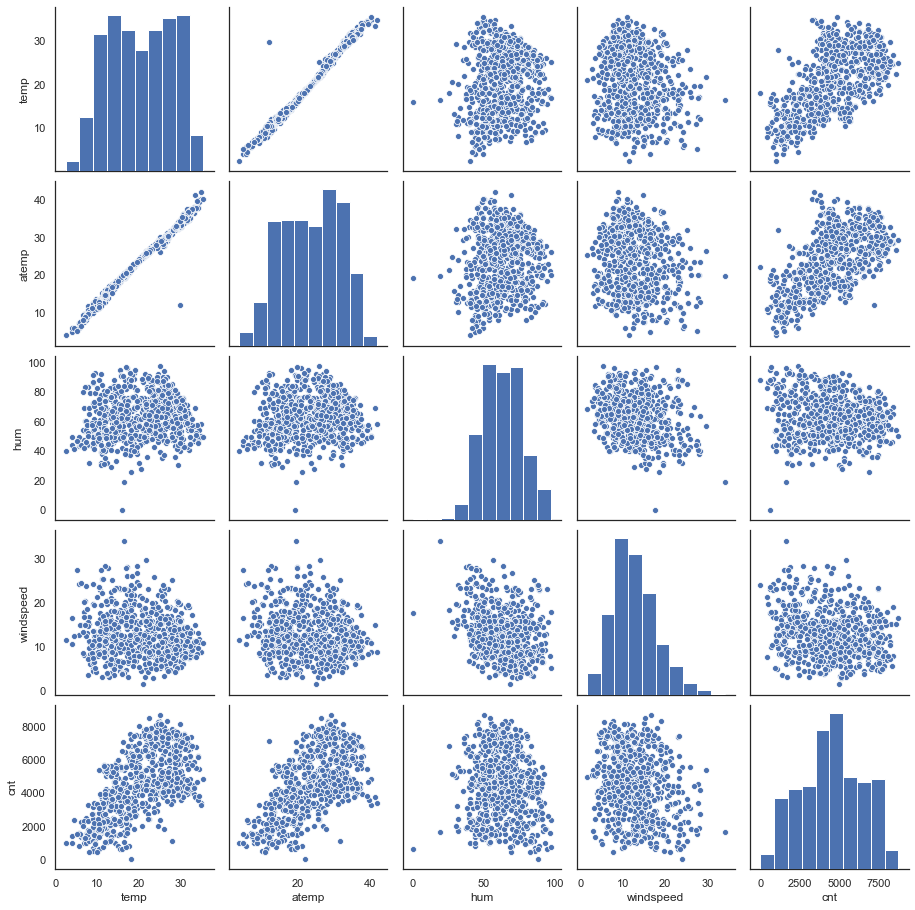

In [11]:
sns.pairplot(data, vars = ['temp','atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

 dropping `atemp` because it's highly corelated

In [12]:
# Temp and atemp are highly correlated so took one them and drop atemp.

data = data.drop('atemp', axis = 1)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,2018-01-01,spring,0,Jan,0,Saturday,0,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,2,2018-02-01,spring,0,Jan,0,Sunday,0,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,3,2018-03-01,spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,4,2018-04-01,spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,5,2018-05-01,spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables with respect to the traget variable.

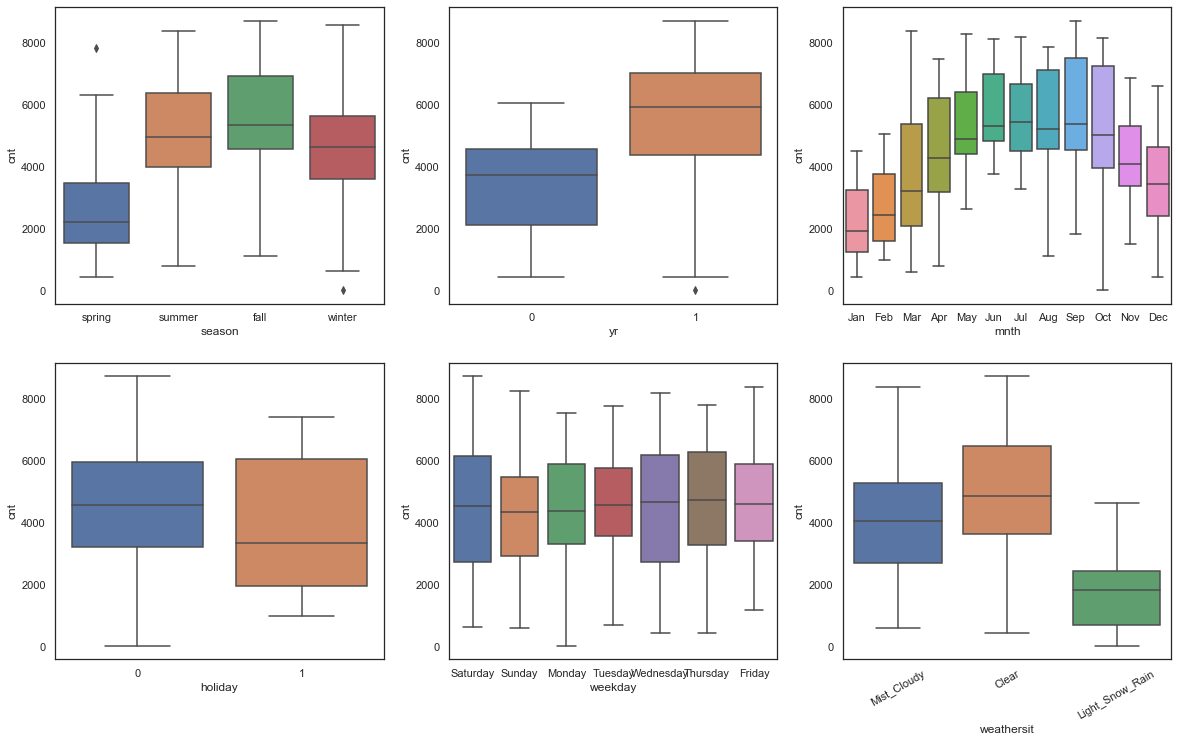

In [13]:
vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit']
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.xticks(rotation = '30')
plt.show()

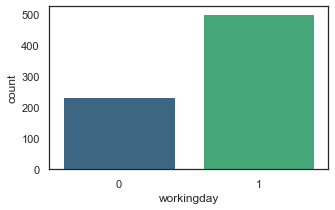

In [14]:
plt.figure(figsize=(5,3))
sns.countplot(x='workingday',data=data,palette='viridis')
plt.show()

- As we can see the count of bikes are high on `workingday`.


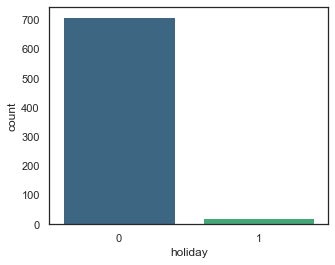

In [15]:
plt.figure(figsize=(5,4))
sns.countplot(x='holiday',data=data,palette='viridis')
plt.show()

- Number of bikes are higher when there is no `holiday`.


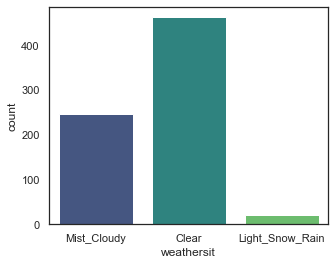

In [16]:
plt.figure(figsize=(5,4))
sns.countplot(x='weathersit',data=data,palette='viridis')
plt.show()

- No of Bikes are higher on the day when the weather is `clear`.


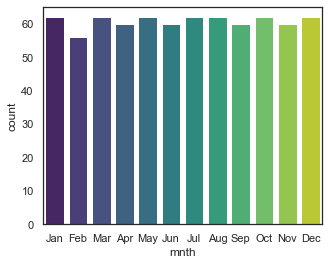

In [17]:
plt.figure(figsize=(5,4))
sns.countplot(x='mnth',data=data,palette='viridis')
plt.show()

### Insights
- In `Summer` and `Fall` the number of count is higher than other season and less in `Spring` season
- In `2019` the number of count is high and less in `2018`
- The number of count is more in non-holiday
- The number of count is more on `Clear` wheather and less in `Light_Snow_Rain`
- Number of bikes are higher when there is no `holiday`.
- As we can see the count of bikes are high on `workingday`.
- No of Bikes are higher on the day when the weather is `clear`.







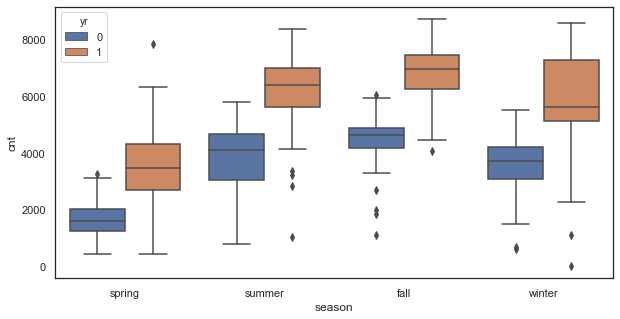

In [18]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'yr', data = data)
plt.show()

### Insights
- In `2019` `Summer` and `Fall` have higher number of Count
- In `2019` `Spring` have very less  number of count in both Two years

In [19]:
# dropping date and instant columns because it doesn't required for further analysis

data.drop(['instant', 'dteday'], axis = 1, inplace = True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


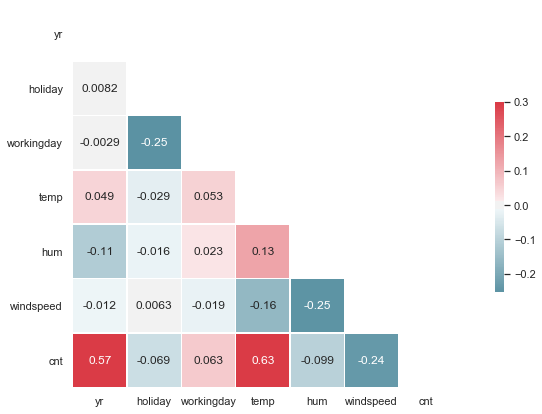

In [20]:
# Compute the correlation matrix
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Correlation is high in `temp` then `yr`

## Step 3: Data Preparation

### Dummy Variables

In [21]:
# Get the dummy variables for the feature 'season','month', 'weekday','weathersit'

season = pd.get_dummies(data['season'], drop_first = True)
month = pd.get_dummies(data['mnth'], drop_first = True)
weekday = pd.get_dummies(data['weekday'], drop_first = True)
weathersit = pd.get_dummies(data['weathersit'], drop_first = True)

In [22]:
# Concatinating the dummyvariables with the primary dataset 

data = pd.concat([data,weathersit, season, month, weekday], axis = 1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Light_Snow_Rain,Mist_Cloudy,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,Jan,0,Saturday,0,Mist_Cloudy,14.110847,80.5833,10.749882,985,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,spring,0,Jan,0,Sunday,0,Mist_Cloudy,14.902598,69.6087,16.652113,801,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [23]:
# Dropping the the variables which are already created for dummy variables

data = data.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1)
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Light_Snow_Rain,Mist_Cloudy,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,80.5833,10.749882,985,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


## Step 4: Splitting the Data into Training and Testing Sets


In [24]:
df_train, df_test = train_test_split(data, test_size = 0.3, random_state = 100)
print('train shape', df_train.shape)
print('test shape', df_test.shape)

train shape (511, 29)
test shape (219, 29)


### Rescaling the Features 


In [25]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
# I used MinMax Scaler to scale the Numerical variables

scaler = MinMaxScaler()
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Light_Snow_Rain,Mist_Cloudy,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [26]:
# After scaling the scaled variables are in between 0 to 1 becaues we have used MinMax Scaler

df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Light_Snow_Rain,Mist_Cloudy,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.650333,0.320844,0.514186,0.029354,0.344423,0.242661,0.246575,0.248532,0.095890,0.084149,0.066536,0.088063,0.076321,0.076321,0.097847,0.084149,0.086106,0.086106,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513
std,0.500412,0.157613,0.468042,0.225640,0.145741,0.169639,0.224737,0.168963,0.475645,0.429112,0.431440,0.432585,0.294729,0.277883,0.249461,0.283664,0.265771,0.265771,0.297399,0.277883,0.280795,0.280795,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.538858,0.199179,0.356765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.653499,0.298098,0.519673,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754401,0.414438,0.688737,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [27]:
y_train = df_train.pop('cnt')
X_train = df_train

In [28]:
# Checking the shape of the train dataframe

print('X_train Shape', X_train.shape)
print('y_train Shape', y_train.shape)

X_train Shape (511, 28)
y_train Shape (511,)


In [29]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [30]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Light_Snow_Rain', True, 1),
 ('Mist_Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 12),
 ('Feb', False, 5),
 ('Jan', False, 14),
 ('Jul', False, 13),
 ('Jun', False, 4),
 ('Mar', False, 2),
 ('May', False, 3),
 ('Nov', False, 11),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('Monday', False, 7),
 ('Saturday', True, 1),
 ('Sunday', False, 6),
 ('Thursday', False, 9),
 ('Tuesday', False, 8),
 ('Wednesday', False, 10)]

In [31]:
# After used RFE here RFE selected these variables should be used for modeling
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Light_Snow_Rain', 'Mist_Cloudy', 'spring', 'summer', 'winter', 'Aug',
       'Oct', 'Sep', 'Saturday'],
      dtype='object')

In [32]:
# After used RFE here RFE selected these variables should not be used for modeling
X_train.columns[~rfe.support_]

Index(['Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Monday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

## Step 5: Building a linear model using statsmodel, for the detailed statistics


In [33]:
# Creating dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,Light_Snow_Rain,Mist_Cloudy,spring,summer,winter,Aug,Oct,Sep,Saturday
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,0,1,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,1,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,0,1


### Model 1

In [34]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train, X_train_rfe).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.24e-191
Time:                        10:53:18   Log-Likelihood:                 520.25
No. Observations:                 511   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -940.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2249      0.036     

`spring` is insignificant because it has high p-value in presence of other variables so it should be dropped

In [35]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [36]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.62
3,temp,16.27
2,workingday,5.39
5,windspeed,4.75
8,spring,4.73
10,winter,4.53
9,summer,3.30
7,Mist_Cloudy,2.29
0,yr,2.09
14,Saturday,2.00


In [37]:
X_train_new = X_train_new.drop(["spring"], axis = 1)
X_train_new.head()

,yr,holiday,workingday,temp,hum,windspeed,Light_Snow_Rain,Mist_Cloudy,summer,winter,Aug,Oct,Sep,Saturday
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,1,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,1,0,0,0,0,1


Rebuilding the model without `spring`

### Model 2

In [38]:
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

# Running the linear model
lm_1 = sm.OLS(y_train, X_train_new).fit()   

#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.11e-192
Time:                        10:53:21   Log-Likelihood:                 519.33
No. Observations:                 511   AIC:                            -1009.
Df Residuals:                     496   BIC:                            -945.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1951      0.029     

In [39]:
# Calculate the VIFs for the new model

X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.58
3,temp,10.03
2,workingday,5.06
5,windspeed,3.83
9,winter,2.27
7,Mist_Cloudy,2.14
0,yr,2.03
13,Saturday,1.90
8,summer,1.84
11,Oct,1.62


All the p-value are below the sigficance level but `hum` have high VIF so it should be dropped

In [40]:
X_train_new = X_train_new.drop(['hum'], axis=1)

Rebuilding the model without `hum`

### Model 3

In [41]:
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

# Running the linear model
lm_2 = sm.OLS(y_train, X_train_new).fit()   

#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.30e-189
Time:                        10:53:23   Log-Likelihood:                 508.46
No. Observations:                 511   AIC:                            -988.9
Df Residuals:                     497   BIC:                            -929.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0935      0.019     

In [42]:
# Calculate the VIFs for the new model

X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.40
2,workingday,4.41
4,windspeed,3.61
0,yr,2.03
8,winter,2.02
7,summer,1.83
12,Saturday,1.77
10,Oct,1.62
9,Aug,1.59
6,Mist_Cloudy,1.54


All the p-value are below the sigficance level but when we are dropping `temp` variable the R-sqrd drop to 66% but when drop  `workingday` the R-sqrd decrease less so it should be dropped

In [43]:
X_train_new = X_train_new.drop(['workingday'], axis=1)

Rebuilding the model without `workingday`

### Model 4

In [44]:
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

# Running the linear model
lm_3 = sm.OLS(y_train, X_train_new).fit()   

#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.18e-186
Time:                        10:53:25   Log-Likelihood:                 500.09
No. Observations:                 511   AIC:                            -974.2
Df Residuals:                     498   BIC:                            -919.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1317      0.017     

In [45]:
# Calculate the VIFs for the new model

X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,3.18
0,yr,2.01
7,winter,1.95
6,summer,1.83
9,Oct,1.60
8,Aug,1.59
5,Mist_Cloudy,1.49
10,Sep,1.34
11,Saturday,1.18


`Saturday` is insignificant because it has high p-value in presence of other variables so it should be dropped

In [46]:
X_train_new = X_train_new.drop(['Saturday'], axis=1)

Rebuilding the model without `Saturday`

### Model 5

In [47]:
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

# Running the linear model
lm_4 = sm.OLS(y_train, X_train_new).fit()   

#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     229.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.87e-187
Time:                        10:53:27   Log-Likelihood:                 498.72
No. Observations:                 511   AIC:                            -973.4
Df Residuals:                     499   BIC:                            -922.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1347      0.017     

In [48]:
# Calculate the VIFs for the new model

X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.12
3,windspeed,3.11
0,yr,2.01
7,winter,1.95
6,summer,1.83
9,Oct,1.60
8,Aug,1.59
5,Mist_Cloudy,1.49
10,Sep,1.34
4,Light_Snow_Rain,1.09


`Oct` is insignificant because it has high p-value in presence of other variables so it should be dropped

In [49]:
X_train_new = X_train_new.drop(['Oct'], axis=1)

Rebuilding the model without `Oct`

### Model 6

In [50]:
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

# Running the linear model
lm_5 = sm.OLS(y_train, X_train_new).fit()   

#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.10e-187
Time:                        10:53:29   Log-Likelihood:                 496.84
No. Observations:                 511   AIC:                            -971.7
Df Residuals:                     500   BIC:                            -925.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1305      0.017     

In [51]:
# Calculate the VIFs for the new model

X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.02
3,windspeed,3.11
0,yr,2.00
6,summer,1.82
8,Aug,1.58
5,Mist_Cloudy,1.49
7,winter,1.49
9,Sep,1.31
4,Light_Snow_Rain,1.08
1,holiday,1.04


All the p-value are below the sigficance level but when we are dropping `temp` variable the R-sqrd drop to 66% but when drop  `windspeed` the R-sqrd decrease less so it should be dropped

In [52]:
X_train_new = X_train_new.drop(['windspeed'], axis=1)

Rebuilding the model without `windspeed`

### Model 7

### Final Model

- `9` variables are selected for Final Model

In [53]:
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

# Running the linear model
lm_6 = sm.OLS(y_train, X_train_new).fit()   

#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.58e-181
Time:                        10:53:32   Log-Likelihood:                 479.43
No. Observations:                 511   AIC:                            -938.9
Df Residuals:                     501   BIC:                            -896.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0696      0.014     

In [54]:
# Calculate the VIFs for the new model

X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.93
0,yr,1.95
5,summer,1.79
7,Aug,1.56
6,winter,1.47
4,Mist_Cloudy,1.44
8,Sep,1.29
3,Light_Snow_Rain,1.06
1,holiday,1.03


- R-squared: `82.2`
- Adj. R-squared: `81.9`
- All the p values are under the significance level(0.05)
- All the VIF values are below 5 and most of the variable are under 2 


## Residual Analysis of the train data


In [55]:
y_train_cnt = lm.predict(X_train_rfe)

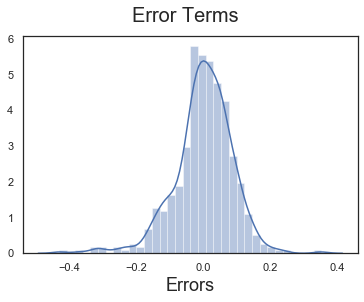

In [56]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(y_train - y_train_cnt)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

- The above distribution plot shows that It's centered around Zero
- The shape is looks as a good Normal distribution

## Making Prediction

#### Applying the scaling on the test set

In [57]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Light_Snow_Rain,Mist_Cloudy,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


#### Dividing into X_test and y_test

In [58]:
y_test = df_test.pop('cnt')
X_test = df_test

In [59]:
# Now let's use our model to make predictions 

# Creating X_test dataframe by dropping variables from X_test 
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [60]:
# Making Predictions
y_pred = lm_6.predict(X_test_new)
round(100*(r2_score(y_test, y_pred)))

80.0

Here we got R-sqrd `80 %` on test set

## Model Evaluation


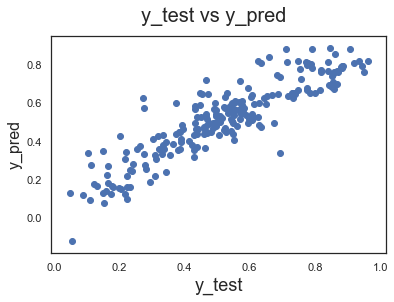

In [61]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

We can see that the equation of our best fitted line is:

$ cnt = 0.2319  \times  yr - 1.001  \times  holiday + 0.5393 \times temp - 0.2971 \times Light_Snow_Rain - 0.08 \times Mist_Cloudy + 0.0967 \times summer + 0.1461 \times winter + 0.1461 \times winter + 0.0582 \times Aug + 0.1234 \times Sep $


Overall we have a decent model, but we also could do better. 

We have a couple of options:
1. Add new features 
2. Build a non-linear model

### Conclusion --

- 1 - holiday, season spring, month july wheather like raining and mist cloudy effects negatively if there is holiday and season spring then demand for bike will significantly decrease.
- 2 - yr, season summer, winter, temp month sept these feature increase the demand if the temperature is good then demand will increase 

### Suggestion --


 - In summer and winter the demand will increase but in spring season the demand can due to the -ve coefficients,hence the company sholud focus on spring and provide some attractive offers to the customers so that the demand will be more
 - wheather situation is taking a vital role over here if the wheather is clear then the demand will be increase